# Exploring `SpatialData` objects using `napari`

Napari is a Python library for n-dimensional image visualisation, annotation, and analysis. With napari you can explore, modify and annotate 2D, 3D, and higher-dimensional data. Within the `SpatialData` ecosystem we provide the `napari-spatialdata` plugin that allows you do load `SpatialData` objects into `napari`.

⚠️ Adjust the variable below to the data path on your specific workstation.

In [1]:
%load_ext jupyter_black

data_path = "../data/"

In [2]:
import spatialdata as sd
import spatialdata_plot as sdp
import napari_spatialdata as nsd
import matplotlib.pyplot as plt
import pandas as pd

for p in [sd, sdp, nsd]:
    print(f"{p.__name__}: {p.__version__}")

sdata_visium = sd.read_zarr(data_path + "visium.zarr")
sdata_visium

spatialdata: 0.2.3.dev11+g8323e15
spatialdata_plot: 0.2.6
napari_spatialdata: 0.5.2.post2.dev17+g7611861.d20240911


SpatialData object, with associated Zarr store: /Users/macbook/embl/projects/basel/spatialdata-workshops/data/visium.zarr
├── Images
│     ├── 'CytAssist_FFPE_Protein_Expression_Human_Glioblastoma_hires_image': DataArray[cyx] (3, 2000, 1744)
│     └── 'CytAssist_FFPE_Protein_Expression_Human_Glioblastoma_lowres_image': DataArray[cyx] (3, 600, 523)
├── Shapes
│     └── 'CytAssist_FFPE_Protein_Expression_Human_Glioblastoma': GeoDataFrame shape: (5756, 2) (2D shapes)
└── Tables
      └── 'table': AnnData (5756, 18085)
with coordinate systems:
    ▸ 'downscaled_hires', with elements:
        CytAssist_FFPE_Protein_Expression_Human_Glioblastoma_hires_image (Images), CytAssist_FFPE_Protein_Expression_Human_Glioblastoma (Shapes)
    ▸ 'downscaled_lowres', with elements:
        CytAssist_FFPE_Protein_Expression_Human_Glioblastoma_lowres_image (Images), CytAssist_FFPE_Protein_Expression_Human_Glioblastoma (Shapes)
    ▸ 'global', with elements:
        CytAssist_FFPE_Protein_Expression_Human_G

## Interactively explore and annotate the data
⚠️ Due to a bug, you currently have to create the empty `Shapes` layer for annotation before loading the existing `Shapes` layer.

In [3]:
sdata_visium

SpatialData object, with associated Zarr store: /Users/macbook/embl/projects/basel/spatialdata-workshops/data/visium.zarr
├── Images
│     ├── 'CytAssist_FFPE_Protein_Expression_Human_Glioblastoma_hires_image': DataArray[cyx] (3, 2000, 1744)
│     └── 'CytAssist_FFPE_Protein_Expression_Human_Glioblastoma_lowres_image': DataArray[cyx] (3, 600, 523)
├── Shapes
│     └── 'CytAssist_FFPE_Protein_Expression_Human_Glioblastoma': GeoDataFrame shape: (5756, 2) (2D shapes)
└── Tables
      └── 'table': AnnData (5756, 18085)
with coordinate systems:
    ▸ 'downscaled_hires', with elements:
        CytAssist_FFPE_Protein_Expression_Human_Glioblastoma_hires_image (Images), CytAssist_FFPE_Protein_Expression_Human_Glioblastoma (Shapes)
    ▸ 'downscaled_lowres', with elements:
        CytAssist_FFPE_Protein_Expression_Human_Glioblastoma_lowres_image (Images), CytAssist_FFPE_Protein_Expression_Human_Glioblastoma (Shapes)
    ▸ 'global', with elements:
        CytAssist_FFPE_Protein_Expression_Human_G

In [4]:
# uncomment to run napari and manually annotate the data
nsd.Interactive(sdata_visium)

/Users/macbook/embl/projects/basel/napari-spatialdata/src/napari_spatialdata/_view.py:213: FutureWarning: Private attribute access ('Window._dock_widgets') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  self._model = model if model else napari_viewer.window._dock_widgets["SpatialData"].widget().viewer_model._model


2024-09-11 13:40:02.549 | INFO     | napari_spatialdata._view:_on_layer_update:351 - Updating layer.
2024-09-11 13:40:02.549 | INFO     | napari_spatialdata._view:_on_layer_update:351 - Updating layer.
2024-09-11 13:40:03.494 | INFO     | napari_spatialdata._view:_on_layer_update:351 - Updating layer.
2024-09-11 13:40:03.662 | INFO     | napari_spatialdata._view:_on_layer_update:351 - Updating layer.
2024-09-11 13:40:22.024 | INFO     | napari_spatialdata._view:_on_layer_update:351 - Updating layer.
2024-09-11 13:40:22.184 | INFO     | napari_spatialdata._view:_on_layer_update:351 - Updating layer.


In [9]:
# The following simulates the regions annotated using napari and makes the notebook reproducible.
# You can disable this cell if you want to annotate the regions yourself using napari
import geopandas as gpd
from shapely.geometry import Polygon

# fmt: off
coords1 = [
    (137, 553), (137, 486), (139, 465), (139, 445), (142, 410), (142, 387),
    (146, 352), (162, 345), (180, 345), (197, 343), (237, 343), (254, 347),
    (289, 363), (300, 377), (304, 393), (302, 410), (287, 418), (267, 425),
    (254, 437), (254, 455), (264, 470), (272, 487), (285, 502), (299, 515),
    (310, 530), (315, 548), (319, 565), (304, 577), (260, 582), (239, 582),
    (222, 575), (202, 572), (185, 570), (137, 553)
]
coords2 = [
    (722, 443), (705, 438), (688, 430), (655, 407), (642, 390), (630, 372),
    (620, 353), (612, 335), (605, 295), (603, 279), (603, 259), (605, 240),
    (618, 222), (658, 179), (690, 157), (705, 149), (723, 140), (757, 120),
    (775, 115), (817, 112), (837, 114), (857, 114), (895, 117), (935, 125),
    (955, 134), (970, 144), (1000, 170), (1015, 180), (1028, 192), (1045, 202),
    (1051, 219), (1055, 235), (1055, 257), (1053, 277), (1050, 293), (1030, 360),
    (1023, 377), (1018, 393), (1003, 407), (995, 423), (985, 438), (968, 445),
    (951, 450), (928, 455), (891, 458), (852, 458), (752, 450), (722, 443)
]
coords3 = [
    (1474, 1594), (1458, 1601), (1439, 1604), (1421, 1604), (1404, 1596),
    (1399, 1579), (1399, 1561), (1408, 1546), (1419, 1531), (1451, 1511),
    (1464, 1499), (1479, 1487), (1496, 1481), (1511, 1491), (1526, 1502),
    (1531, 1519), (1474, 1594)
]
# fmt: on

poly1 = Polygon(coords1)
poly2 = Polygon(coords2)
poly3 = Polygon(coords3)
gdf = sd.models.ShapesModel.parse(
    gpd.GeoDataFrame({"geometry": [poly1, poly2, poly3]}),
    transformations={"downscaled_hires": sd.transformations.Identity()},
)

sdata_visium["ifi6_hotspots"] = gdf

## Inspect the shape we just created

In [5]:
sdata_visium

SpatialData object, with associated Zarr store: /Users/macbook/embl/projects/basel/spatialdata-workshops/data/visium.zarr
├── Images
│     ├── 'CytAssist_FFPE_Protein_Expression_Human_Glioblastoma_hires_image': DataArray[cyx] (3, 2000, 1744)
│     └── 'CytAssist_FFPE_Protein_Expression_Human_Glioblastoma_lowres_image': DataArray[cyx] (3, 600, 523)
├── Shapes
│     ├── 'CytAssist_FFPE_Protein_Expression_Human_Glioblastoma': GeoDataFrame shape: (5756, 2) (2D shapes)
│     └── 'ifi6_hotspots': GeoDataFrame shape: (3, 1) (2D shapes)
└── Tables
      └── 'table': AnnData (5756, 18085)
with coordinate systems:
    ▸ 'downscaled_hires', with elements:
        CytAssist_FFPE_Protein_Expression_Human_Glioblastoma_hires_image (Images), CytAssist_FFPE_Protein_Expression_Human_Glioblastoma (Shapes), ifi6_hotspots (Shapes)
    ▸ 'downscaled_lowres', with elements:
        CytAssist_FFPE_Protein_Expression_Human_Glioblastoma_lowres_image (Images), CytAssist_FFPE_Protein_Expression_Human_Glioblastoma

INFO     Rasterizing image for faster rendering.                                                                   


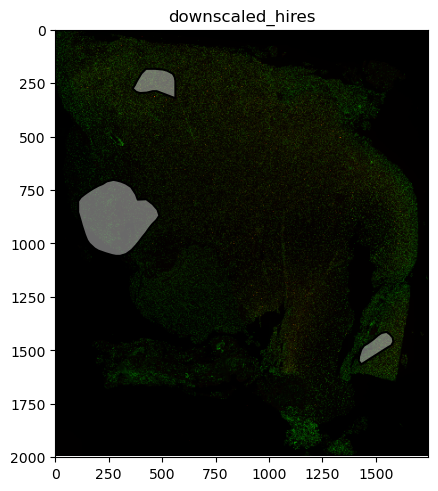

In [6]:
(
    sdata_visium.pl.render_images()
    .pl.render_shapes(
        "ifi6_hotspots",
        outline_alpha=1,
        contour_px=300,
        # method="matplotlib",
        fill_alpha=0.5,
    )
    .pl.show("downscaled_hires")
)

## Use the annotated shape to extract a subpopulation

In [7]:
from spatialdata import polygon_query

polygon = sdata_visium["ifi6_hotspots"].geometry.iloc[0]
filtered_sdata = polygon_query(
    sdata_visium, polygon=polygon, target_coordinate_system="downscaled_hires"
)
filtered_sdata

SpatialData object
├── Images
│     └── 'CytAssist_FFPE_Protein_Expression_Human_Glioblastoma_hires_image': DataArray[cyx] (3, 138, 200)
├── Shapes
│     ├── 'CytAssist_FFPE_Protein_Expression_Human_Glioblastoma': GeoDataFrame shape: (53, 2) (2D shapes)
│     └── 'ifi6_hotspots': GeoDataFrame shape: (1, 1) (2D shapes)
└── Tables
      └── 'table': AnnData (53, 18085)
with coordinate systems:
    ▸ 'downscaled_hires', with elements:
        CytAssist_FFPE_Protein_Expression_Human_Glioblastoma_hires_image (Images), CytAssist_FFPE_Protein_Expression_Human_Glioblastoma (Shapes), ifi6_hotspots (Shapes)
    ▸ 'downscaled_lowres', with elements:
        CytAssist_FFPE_Protein_Expression_Human_Glioblastoma (Shapes)
    ▸ 'global', with elements:
        CytAssist_FFPE_Protein_Expression_Human_Glioblastoma (Shapes)

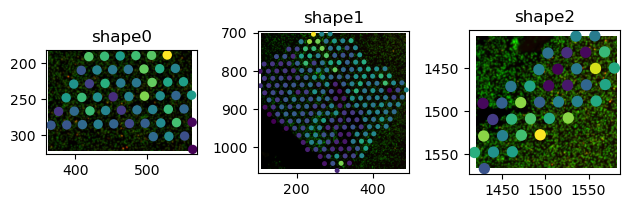

In [8]:
from spatialdata import polygon_query

fig, axs = plt.subplots(1, 3)

idx_in_selection = []

for shape in range(3):

    polygon = sdata_visium["ifi6_hotspots"].geometry.iloc[shape]
    filtered_sdata = polygon_query(
        sdata_visium, polygon=polygon, target_coordinate_system="downscaled_hires"
    )
    filtered_sdata.pl.render_images().pl.render_shapes(
        element="CytAssist_FFPE_Protein_Expression_Human_Glioblastoma",
        color="MT-CO2",
    ).pl.show("downscaled_hires", ax=axs[shape], colorbar=False, title=f"shape{shape}")

    # store names of spots within our 3 selections
    idx_in_selection.extend(filtered_sdata.tables["table"].obs.index.tolist())

plt.tight_layout()

## Use the subpopulation to annotate the original data

In [9]:
idx_in_selection[:3]

['AACGCTCGTGCTGTGA-1', 'AAGTCTCCGTGCTAAG-1', 'AATCAAGCGTATGGTA-1']

In [10]:
sdata_visium.tables["table"].obs["annotation"] = ""

sdata_visium.tables["table"].obs.loc[idx_in_selection, "annotation"] = "IFI6 Hotspot"

INFO     Rasterizing image for faster rendering.                                                                   


/opt/miniconda3/envs/spatialdata-workshop/lib/python3.11/site-packages/spatialdata_plot/pl/basic.py:879: UserWarning: Converting copy of 'annotation' column to categorical dtype for categorical plotting. Consider converting before plotting.
  _render_shapes(
/opt/miniconda3/envs/spatialdata-workshop/lib/python3.11/site-packages/spatialdata_plot/pl/utils.py:782: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_mapping)


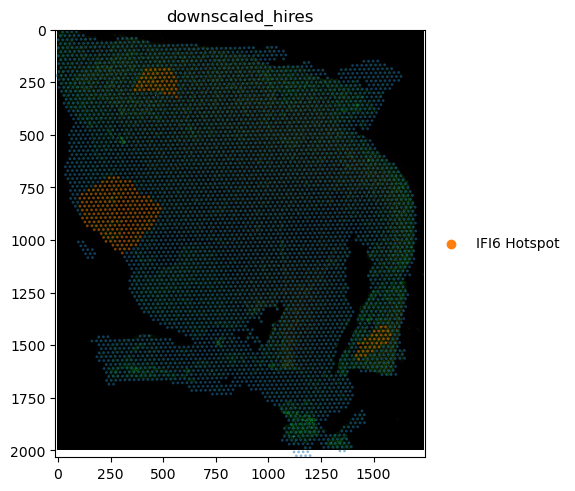

In [11]:
sdata_visium.pl.render_images().pl.render_shapes(
    element="CytAssist_FFPE_Protein_Expression_Human_Glioblastoma",
    color="annotation",
    fill_alpha=0.5,
).pl.show("downscaled_hires")